<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/TensorFlow3_Sarcasm_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json -O /content/sarcasm.json

--2020-04-06 06:08:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 2607:f8b0:400c:c15::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/content/sarcasm.json’

/content/sarcasm.js 100%[===================>]   5.38M  --.-KB/s    in 0.08s   

2020-04-06 06:08:24 (71.3 MB/s) - ‘/content/sarcasm.json’ saved [5643545/5643545]



In [0]:
import numpy as np

#Hyperparameters
vocab_size= 1000
embedding_dim=16
max_length=16
trunc_type='post'
oov_tok= '<OOV>'
training_size=20000

with open('/content/sarcasm.json') as f:
  data= json.load(f)
sentences=[]
labels=[]

for items in data:
  sentences.append(items['headline'])
  labels.append(items['is_sarcastic'])

train_sentence= sentences[0:training_size]
test_sentence= sentences[training_size:]
train_label= labels[0:training_size]
test_label= labels[training_size:]
train_label_final= np.array(train_label)
test_label_final= np.array(test_label)

In [0]:
token= Tokenizer(num_words=vocab_size, oov_token= oov_tok)
token.fit_on_texts(train_sentence)
word_index= token.word_index
#for training data
sequences= token.texts_to_sequences(train_sentence)
padded= pad_sequences(sequences, maxlen=max_length,padding='post', truncating=trunc_type)
#for testing data
test_sequences= token.texts_to_sequences(test_sentence)
test_padded= pad_sequences(test_sequences,padding='post', maxlen=max_length)

In [5]:
#Model building
model= tf.keras.Sequential([
                            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
                            tf.keras.layers.GlobalAveragePooling1D(),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [6]:
history=model.fit(padded,
          train_label_final,
          epochs=10,
          validation_data=(test_padded, test_label_final))

Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5601 - accuracy: 0.7125 - val_loss: 0.4295 - val_accuracy: 0.8037
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.8242 - val_loss: 0.4010 - val_accuracy: 0.8126
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3649 - accuracy: 0.8356 - val_loss: 0.3994 - val_accuracy: 0.8144
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3572 - accuracy: 0.8382 - val_loss: 0.4013 - val_accuracy: 0.8098
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3537 - accuracy: 0.8409 - val_loss: 0.4032 - val_accuracy: 0.8113
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3509 - accuracy: 0.8411 - val_loss: 0.4037 - val_accuracy: 0.8135
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3487 - accuracy: 0.8419 - val_loss: 0.4045 - val_accuracy: 0.8123
Epoch 

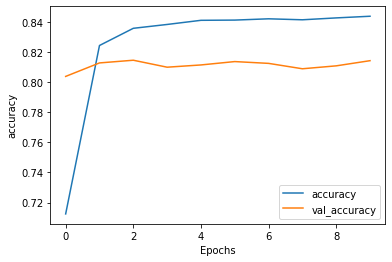

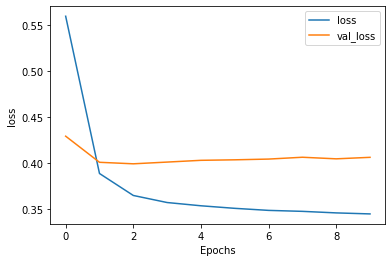

In [7]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()

plot_graph(history, "accuracy")
plot_graph(history, "loss")